# SNEAKER RESELLING FOR DUMMIES:

Have you been wanting to get your feet wet in this lucrative sneaker industry, but don't know where to start? Lucky you! This notebook will jumpstart you as to what features you should be focusing on as a reseller. Data sourced from StockX, a sneaker-reselling platform. The rows represent daily sales of X% of all Nike x Off-White and Yeezy 350 drop between Sept. 9, 2017 to February 13, 2019 (U.S. only).

# Environment Set-Up

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [3]:
cd ../../../datasets/sneaker

/Users/shelawu/DAT/datasets/sneaker


In [3]:
pd.set_option('display.max_rows', None)

In [4]:
stockx = pd.read_csv('StockX-Data-Contest-2019-3.csv')
stockx.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


# Preprocessing
### Data Cleaning

In [5]:
stockx.rename(columns={'Order Date': 'order_date', 'Brand': 'brand', 'Sneaker Name': 'sneaker_name', 'Sale Price': 'sale_price', 'Retail Price': 'retail_price', 'Release Date': 'release_date', 'Shoe Size': 'shoe_size', 'Buyer Region': 'buyer_region'}, inplace=True)

In [6]:
# remove '-' from sneaker title
stockx['sneaker_name'] = stockx.sneaker_name.str.replace('-', ' ')

In [7]:
# remove '$' from prices
stockx['sale_price'] = [x[1:] for x in stockx.sale_price]
stockx['retail_price'] = [x[1:] for x in stockx.retail_price]

# remove ',' from prices
stockx['sale_price'] = stockx.sale_price.str.replace(',', '')
stockx['retail_price'] = stockx.retail_price.str.replace(',', '')

In [8]:
stockx['brand'] = stockx.brand.str.replace(' Yeezy', 'Yeezy')

In [9]:
# impute NULL values -- none to impute
stockx.isnull().sum()

order_date      0
brand           0
sneaker_name    0
sale_price      0
retail_price    0
release_date    0
shoe_size       0
buyer_region    0
dtype: int64

#### Adjust the datatypes

In [10]:
stockx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
order_date      99956 non-null object
brand           99956 non-null object
sneaker_name    99956 non-null object
sale_price      99956 non-null object
retail_price    99956 non-null object
release_date    99956 non-null object
shoe_size       99956 non-null float64
buyer_region    99956 non-null object
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [10]:
# convert shoe size into string since it's nominal
# convert sale_price & retail_price to int
# convert order_date & release_date to datetime64
stockx[['sale_price', 'retail_price']] = stockx[['sale_price', 'retail_price']].astype(str).astype(int)

In [11]:
stockx['order_date'] = stockx['order_date'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%y'))
stockx['release_date'] = stockx['release_date'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%y'))

### Shoes are stock - let's create a time component and gross profit quantifier.
As a reseller, you want to time your sale just right! While I didn't have time to statistically analyze sneaker appredication & depreciation patterns, there's an unspoken understanding of ideal times to sell.

In [12]:
stockx['buy_time'] = (stockx.order_date - stockx.release_date).dt.days

In [14]:
stockx.buy_time.describe()
# the negative means it's pre-order

count    99956.000000
mean       183.708722
std        232.354142
min        -69.000000
25%         10.000000
50%         56.000000
75%        345.000000
max       1321.000000
Name: buy_time, dtype: float64

In [13]:
df = stockx.drop(['order_date', 'release_date'], axis=1)

# Exploratory Data Analysis 
__Part 1:__ What's the most profitable shoe size as a reseller? This is where we'll bring in an average resale quantifier. When we look at these bar charts, we're looking for stability on item, aka should not fluctuate (indicated via high std).

<br> ** Not sure why the standard deviation bars aren't showing up anymore. 

In [14]:
df['resale_multiple'] = (np.abs(df.sale_price - df.retail_price) / df.retail_price)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [19]:
sales = df.groupby('shoe_size')['resale_multiple'].describe()
sales.reset_index(inplace=True)
sales.head()

,shoe_size,count,mean,std,min,25%,50%,75%,max
0,3.5,4.0,1.062591,0.471729,0.586364,0.767591,0.994000,1.289000,1.676000
1,4.0,2241.0,0.883643,1.084761,0.000000,0.227273,0.486364,1.000000,15.052632
2,4.5,1304.0,0.944271,1.123160,0.000000,0.259091,0.452273,1.123864,8.473684
3,5.0,3577.0,0.867207,1.056126,0.000000,0.240909,0.504545,0.950000,10.500000
4,5.5,2621.0,0.762123,0.867742,0.000000,0.259091,0.409091,0.954545,9.526316


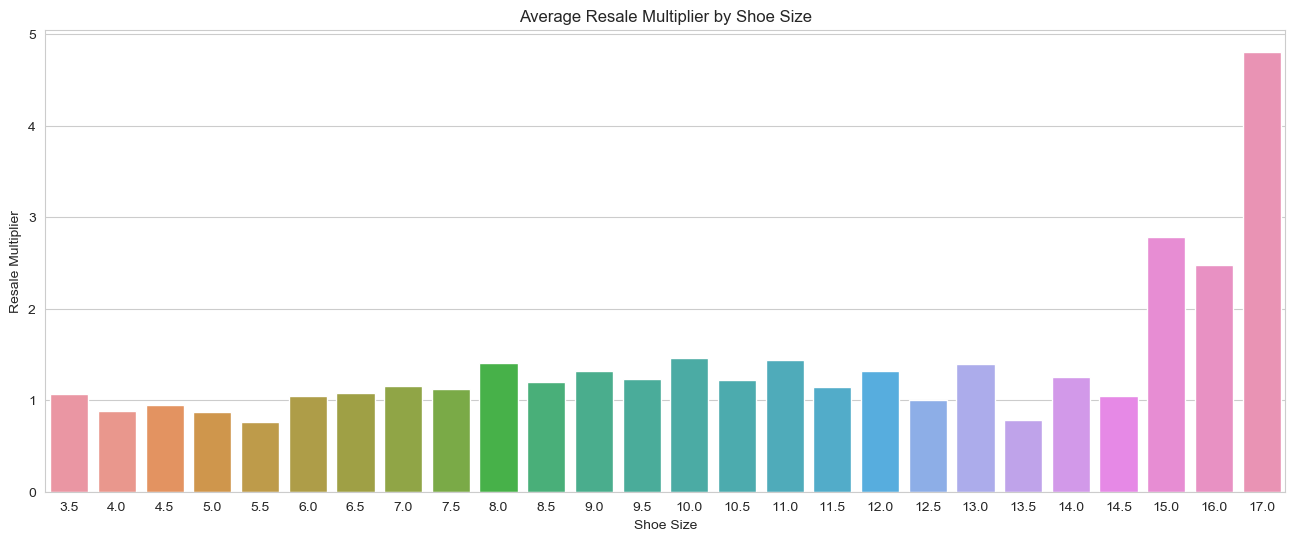

In [20]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.barplot(x='shoe_size', y='mean', ci='sd', data = sales);
plt.title('Average Resale Multiplier by Shoe Size')
plt.xlabel('Shoe Size')
plt.ylabel('Resale Multiplier')
plt.show()

In [21]:
# looking at sales per size by Brand
div_sales = df.groupby(['brand','shoe_size'])['resale_multiple'].describe()
div_sales.reset_index(inplace=True)

In [22]:
# average drop runs sizes 4 to 13 so let's zoom in on that within each brand
zoom_yzy = div_sales[(div_sales.shoe_size >= 4.0) & (div_sales.shoe_size <= 13.0) & (div_sales.brand == 'Yeezy')]
zoom_ow = div_sales[(div_sales.shoe_size >= 4.0) & (div_sales.shoe_size <= 13.0) & (div_sales.brand == 'Off-White')]

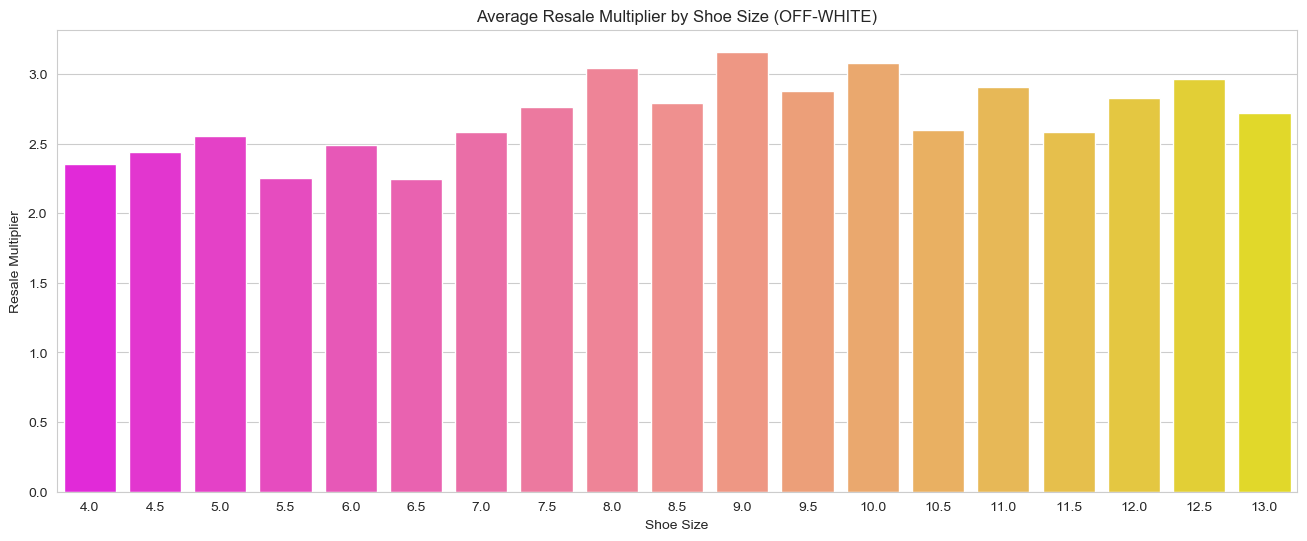

In [23]:
div_sales['shoe_size'] = div_sales['shoe_size'].astype(str).astype(float)
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
ow = sns.barplot(x='shoe_size', y='mean', ci='std', data = zoom_ow, palette='spring')

plt.title('Average Resale Multiplier by Shoe Size (OFF-WHITE)')
plt.xlabel('Shoe Size')
plt.ylabel('Resale Multiplier')
plt.show()

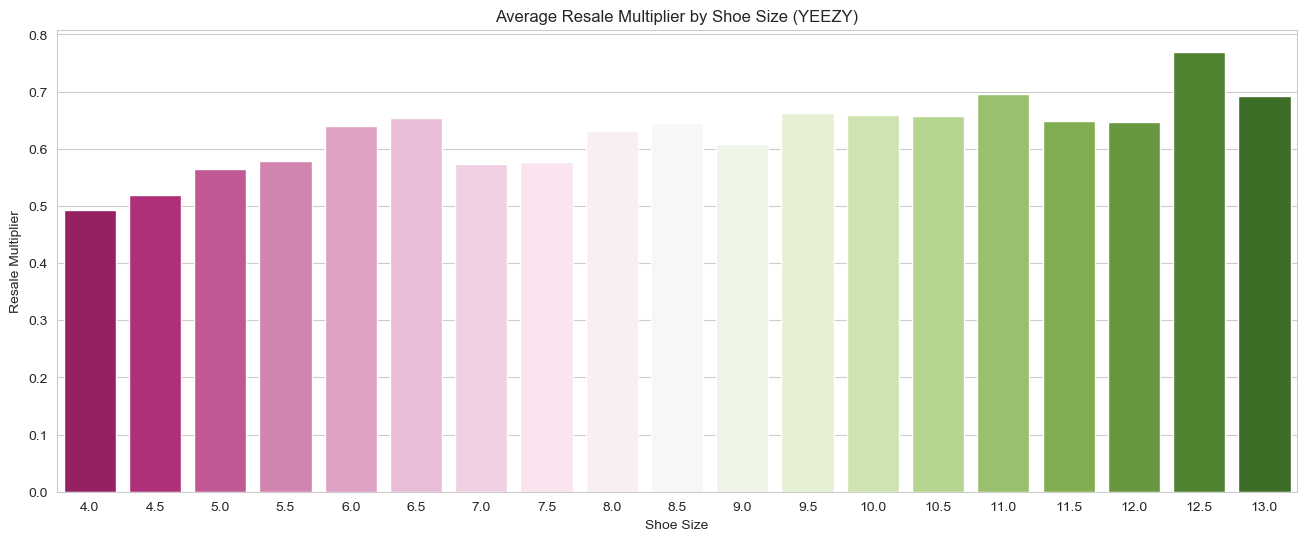

In [24]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
ow = sns.barplot(x='shoe_size', y='mean', ci='sd', data = zoom_yzy, palette='PiYG')

plt.title('Average Resale Multiplier by Shoe Size (YEEZY)')
plt.xlabel('Shoe Size')
plt.ylabel('Resale Multiplier')
plt.show()

__Part 2:__ We also want to look at geographic features as a reseller! A bar graph is not my preferred way to express where the location hotbeds are but, due to time, it'll do. Ideally, I would implement a heatmap over the states.

In [25]:
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [26]:
geo = df.groupby('buyer_region')['resale_multiple'].describe()
geo.reset_index(inplace=True)
geo.replace({'buyer_region': states}, inplace=True)

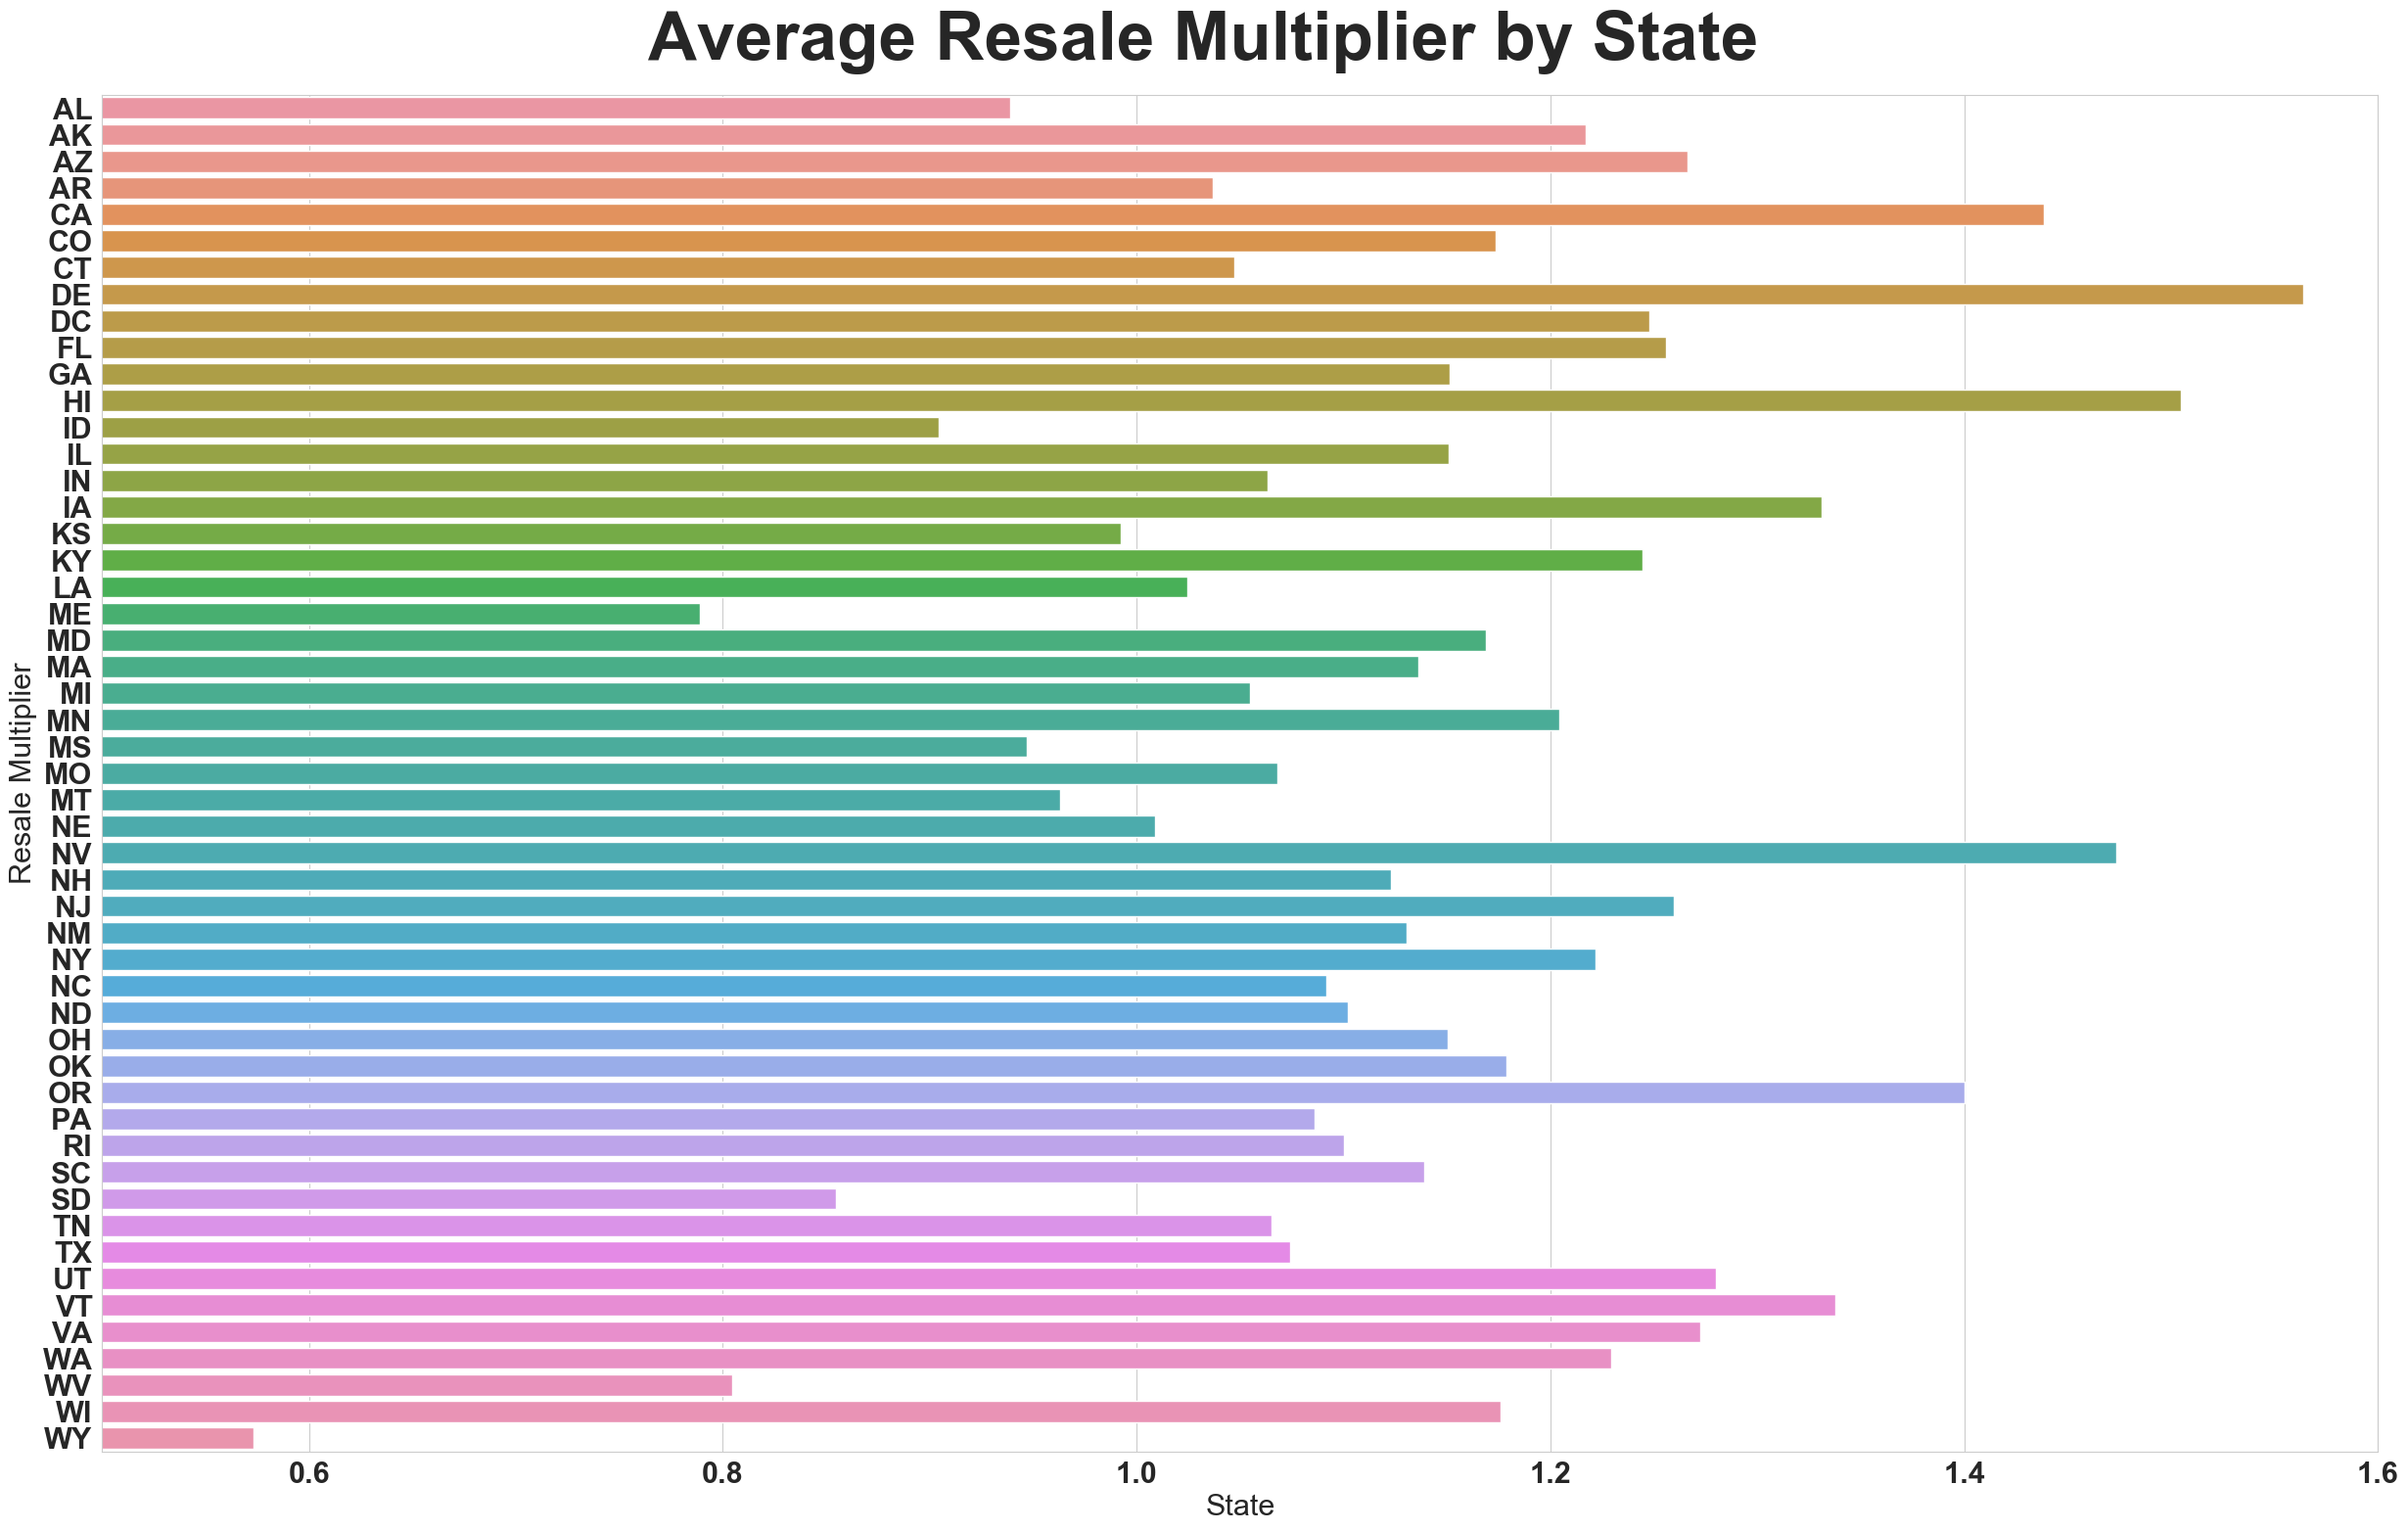

In [27]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

# if i had time, would've grouped off by North American region to make it useful 
plt.figure(figsize=(30, 18))
sns.set_style("whitegrid")
sns.barplot(x='mean', y='buyer_region', ci='sd', data = geo, orient = 'h');
plt.xlim([0.5,1.6])
plt.figtext(.5,.9,'Average Resale Multiplier by State', fontsize=50, ha='center')
plt.xlabel('State')
plt.ylabel('Resale Multiplier')
plt.show()

# Shoe Price Generator (pipeline):
Using RF, I can estimate how much your shoe will sell for!

### Random Forest Regressor:
Given the brand, retail price, state you bought, shoe size, and sneaker model. I can give you a minimum estimate of how much your shoes would go for if you were to sell them now! Like mentioned before, there are preferred "hotbed" times for a reseller to place their shoe on the market.

- Nominal: brand, state, shoe size, sneaker model
- Ordinal: buy_time (if we bin it - for comparison later)

In [16]:
df['shoe_size'] = df['shoe_size'].astype(str)

In [17]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

#ore   = OrdinalEncoder(cols=['buy_time'], mapping=[col_mapping])
ohe   = OneHotEncoder()
rf    = RandomForestRegressor()


rf_pipe = make_pipeline(ohe, rf)

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split

# make sure to drop resale multiple as its directly linked to sale price
X = df.drop(['sale_price', 'resale_multiple'], axis=1)
y = df['sale_price']

Selecting the best train/test split:

In [33]:
test_size_samples = np.arange(0.1, 0.3, 0.05)
test_size_scores = []

for size in test_size_samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=4)
    rf_pipe.fit(X_train, y_train)
    score = np.mean(cross_val_score(estimator=rf_pipe, X=X_train, y=y_train, cv=10))
    test_size_scores.append((score, size))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
max(test_size_scores)

(0.9794600747209345, 0.1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2020)

Finding the optimal amount of folds:

In [36]:
fold_samples = np.arange(5,11)
fold_scores = []
fold_list = []

for fold in fold_samples:
    score = np.mean(cross_val_score(estimator=rf_pipe, X=X_train, y=y_train, cv=fold))
    fold_scores.append((score,fold))
    fold_list.append(score)

In [38]:
# default is 10
fold_scores

[(0.9791192513706211, 5),
 (0.9794307919686757, 6),
 (0.9792253595870486, 7),
 (0.9790512239348989, 8),
 (0.9794728105163993, 9),
 (0.9796187253887367, 10)]

In [37]:
max(fold_scores)

(0.9796187253887367, 10)

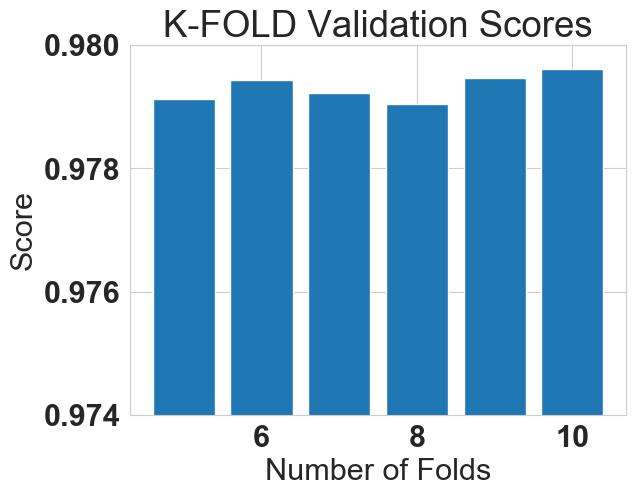

In [42]:
# minimal difference

plt.bar(fold_samples, fold_list)
plt.ylim([0.974, 0.98])
plt.ylabel('Score')
plt.xlabel('Number of Folds')
plt.title('K-FOLD Validation Scores')
plt.show()

Hyper-parameter tuning -- validation scores correspond to default's score. First: **n-estimators**

In [43]:
est_samples = [10, 50, 75]
est_scores = []

for est in est_samples:
    rf_pipe.steps[-1][1].set_params(n_estimators=est)
    scores = cross_val_score(estimator=rf_pipe, X=X_train, y=y_train, cv=10)
    est_scores.append((np.mean(scores), est))

In [44]:
# default n_estimators=10
est_scores

[(0.9795275324819152, 10), (0.9805421678320704, 50), (0.9805681987872363, 75)]

In [45]:
max(est_scores)

(0.9805681987872363, 75)

In [20]:
rf_pipe.steps[-1][1].set_params(n_estimators=75)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

**min_samples_leaf**

In [ ]:
leaf_samples = [1, 5, 10, 25]
rf_scores = []

for leaf in leaf_samples:
    rf_pipe.steps[-1][1].set_params(min_samples_leaf=leaf)
    scores = cross_val_score(estimator=rf_pipe, X=X_train, y=y_train, cv=10)
    rf_scores.append((np.mean(scores), leaf))

In [ ]:
# default min_samples_leaf = 1
rf_scores

In [ ]:
max(rf_scores)

In [22]:
rf_pipe.steps[-1][1].set_params(min_samples_leaf=5)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

**max_features**

In [ ]:
feat_samples = [0.2, 0.4, 0.6, 0.8]
feat_scores = []

for feat in feat_samples:
    rf_pipe.steps[-1][1].set_params(max_features=feat)
    scores = cross_val_score(estimator=rf_pipe, X=X_train, y=y_train, cv=10)
    feat_scores.append((np.mean(scores), feat))

In [ ]:
feat_scores

In [ ]:
max(feat_scores)

In [23]:
rf_pipe.steps[-1][1].set_params(max_features=0.6)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Fit models:
Fit  cross validated pipelines on your **entire** training set

In [25]:
rf_pipe.fit(X_train, y_train)
rf_preds = rf_pipe.predict(X_test)

In [26]:
np.mean(cross_val_score(estimator=rf_pipe, X=X_test, y=y_test, cv=10))

0.9382073897897072

In [27]:
# Calculating Mean Absolute Error
errors = abs(rf_preds - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# 84.4% prediction accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.83 %.


What are the most impactful features?

In [ ]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)



plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.barplot(x=features, y=importances)

plt.title('Average Resale Multiplier by Shoe Size (YEEZY)')
plt.xlabel('Shoe Size')
plt.ylabel('Resale Multiplier')
plt.show()

### Extra: Let's see if the resellers tried & true seller timeline matches up:
The following bins are adapted from the unspoken timeline resellers abide by. Let's see how accurate this timeline really is.

In [41]:
query = (stockx.order_date - stockx.release_date).dt.days

# create col for bins
buy_time = [
    (query < 0), 
    (query >= 0) & (query < 31),
    (query >= 31) & (query < 184), 
    (query >= 184)
]


bins = ['preorder', 'release', 'mid', 'ice']

df['buy_time'] = np.select(buy_time, bins)

In [42]:
# for ordinal encoding
buytime_mapping = {
    'preorder': 3,
    'release':1,
    'mid': 0, 
    'ice': 2   
}

col_mapping = {
    'col': 'buy_time',
    'mapping': buytime_mapping 
}

In [43]:
ore   = OrdinalEncoder(cols=['buy_time'], mapping=[col_mapping])
test_pipe = make_pipeline(ore, ohe, rf)

In [44]:
# declare variables
XX = df.drop(['sale_price', 'resale_multiple'], axis=1)
yy = df['sale_price']

In [45]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.1, random_state=2020)

In [46]:
# optimize parameters
test_pipe.steps[-1][1].set_params(n_estimators=50, min_samples_leaf=5, max_features=0.6)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
test_pipe.fit(XX_train, yy_train)
test_preds = test_pipe.predict(XX_test)

In [48]:
np.mean(cross_val_score(estimator=rf_pipe, X=X_test, y=y_test, cv=10))

0.9384213110521303

In [49]:
# Calculating Mean Absolute Error
errors = abs(rf_preds - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# 84.4% prediction accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.83 %.


# Serialized Pipeline:

In [50]:
import pickle

with open('snkr_pipe.pkl', 'wb') as pipe:
    pickle.dump(rf_pipe, pipe)